# 직접 Feature 추가 후 DNN 적용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import os

## Data Read

In [2]:
nasdaq = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/nasdaq.csv', index_col=0, parse_dates=True)
snp = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/snp500.csv', index_col=0, parse_dates=True)
ftse = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/ftse.csv', index_col=0, parse_dates=True)
dax = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/dax.csv', index_col=0, parse_dates=True)
nikkei = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/nikkei.csv', index_col=1, parse_dates=True)
hangseng = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/hang.csv', index_col=0, parse_dates=True)
sanghai = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/sanghai.csv', index_col=0, parse_dates=True)
vix = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/vix.csv', index_col=0, parse_dates=True)
kospi = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/kospi.csv', index_col=0, parse_dates=True)
kosdaq = pd.read_csv('/Users/jcwee/Library/Mobile Documents/com~apple~CloudDocs/src/bitcamp_fintech/project/6. team project4/data/kosdaq.csv', index_col=0, parse_dates=True)

In [3]:
nasdaq.sort_index(inplace=True)
snp.sort_index(inplace=True)
ftse.sort_index(inplace=True)
dax.sort_index(inplace=True)
nikkei.sort_index(inplace=True)
hangseng.sort_index(inplace=True)
sanghai.sort_index(inplace=True)
kospi.sort_index(inplace=True)
kosdaq.sort_index(inplace=True)

In [4]:
nasdaq['Close'] = nasdaq.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Close'] = dax.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Close'] = nikkei['종가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Close'] = hangseng.Close.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Open'] = nasdaq.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Open'] = dax.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Open'] = nikkei['오픈'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Open'] = hangseng.Open.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['High'] = nasdaq.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['High'] = dax.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['High'] = nikkei['고가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['High'] = hangseng.High.apply(lambda x : pd.to_numeric(x.replace(',', '')))

nasdaq['Low'] = nasdaq.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
dax['Low'] = dax.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))
nikkei['Low'] = nikkei['저가'].apply(lambda x : pd.to_numeric(x.replace(',', '')))
hangseng['Low'] = hangseng.Low.apply(lambda x : pd.to_numeric(x.replace(',', '')))

In [5]:
df_list = [nasdaq, snp, ftse, dax, nikkei, hangseng, sanghai, kospi]

## 종가변동률 외의 Feature들 추가

In [6]:
df1 = []
df2 = []
df3 = []
df4 = []
df5 = []
df6 = []
df7 = []
df8 = []
df9 = []
for df in df_list:
    df1.append((df.Close - df.Close.shift(1)) / df.Close.shift(1))
    df2.append((df.Close - df.Open) / df.Open)
    df3.append((df.High - df.Low) / df.Low)
    df4.append((df.High - df.Close) / df.Close)
    df5.append((df.Low - df.Close) / df.Close)
    df6.append((df.Open - df.Open.shift(1)) / df.Open.shift(1))
    df7.append((df.Open - df.Close.shift(1)) / df.Close.shift(1))
    df8.append((df.High - df.High.shift(1)) / df.High.shift(1))
    df9.append((df.Low - df.Low.shift(1)) / df.Low.shift(1))

In [7]:
df1 = pd.concat(df1, axis=1)
df2 = pd.concat(df2, axis=1)
df3 = pd.concat(df3, axis=1)
df4 = pd.concat(df4, axis=1)
df5 = pd.concat(df5, axis=1)
df6 = pd.concat(df6, axis=1)
df7 = pd.concat(df7, axis=1)
df8 = pd.concat(df8, axis=1)
df9 = pd.concat(df9, axis=1)

tail = '_1'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df1.columns = col_names

tail = '_2'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df2.columns = col_names

tail = '_3'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df3.columns = col_names

tail = '_4'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df4.columns = col_names

tail = '_5'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df5.columns = col_names

tail = '_6'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df6.columns = col_names

tail = '_7'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df7.columns = col_names

tail = '_8'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df8.columns = col_names

tail = '_9'
col_names = [f'NASDAQ{tail}', f'S&P500{tail}', f'FTSE{tail}', f'DAX{tail}',
             f'NIKKEI{tail}', f'HANGSENG{tail}', f'SANGHAI{tail}', f'KOSPI{tail}']
df9.columns = col_names

In [8]:
final_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], axis=1)

In [9]:
final_df = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),final_df,how='outer', left_index=True, right_index=True)

In [10]:
final_df.fillna(0, inplace=True)

In [11]:
final_df = final_df.loc['2001-01-03' : '2021-11-11']

In [12]:
y = (kospi.Open - kospi.Close.shift(1)) / kospi.Close.shift(1)

In [13]:
y.name = 'y'
y = pd.merge(pd.DataFrame(pd.date_range('2001-01-01', '2021-11-11')).set_index(0),y,how='outer', left_index=True, right_index=True)

In [14]:
y_df = y.loc['2001-01-03' : '2021-11-11']

In [15]:
y_df.head(10)

,y
2001-01-03,-0.015760
2001-01-04,0.057726
2001-01-05,0.002724
2001-01-06,NaN
2001-01-07,NaN
2001-01-08,-0.012275
2001-01-09,-0.004773
2001-01-10,-0.005577
2001-01-11,0.013284
2001-01-12,0.030545


In [16]:
holiday_index = y_df[y_df.y.isnull()].index

In [17]:
from datetime import timedelta

In [18]:
# N번째 휴일의 시작 날짜, 처음 값을 0번째 인덱스 값으로 지정.
start_day = holiday_index[0]

# N번째 휴일의 종료 날짜
end_day = holiday_index[0]

# 휴일기간을 담기위한 목록
holiday_list = []

for i in range(1, len(holiday_index)) :
    
    # N번째 휴일 날짜를 N-1번째 휴일 날짜와 비교해서, 날짜의 차이가 1일이면
    if (holiday_index[i] - holiday_index[i-1]) == timedelta(days=1) :
        
        # 연속된 휴일로 보고 휴일 종료 날짜를 +1일
        end_day = holiday_index[i]
        
    # N번째 휴일 날짜와 N-1번째 휴일 날짜를 비교해서, 날짜의 차이가 1일이 아니면 -> 새로운 휴일의 시작으로 보고 시작과 끝을 바꿔줌.
    else :
        
        # 새로운 휴일을 시작하기 전에 정해진(이전 휴일기간)의 시작과 끝 날짜를 리스트에 담아줌.
        holiday_list.append((start_day, end_day))
        
        # 새로운 휴일 시작 날짜를 새로 지정
        start_day = holiday_index[i]
        
        # 새로운 휴일 종료 날짜도 새로 지정
        end_day = holiday_index[i]

In [19]:
one_day = timedelta(days=1)

X = []
y = []

temp = None

for idx in range(len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start - one_day : holiday_end]
    
#     if len(n_holiday) > 3:
#         temp = n_holiday
#         break
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1

    # KOSPI, KOSDAQ을 제외한 지수들의 누적수익률 데이터
    X_data = n_holiday_change.loc[holiday_end].apply(lambda x : round(x, 4))

    # D+1일 KOSPI의 실제 수익률 y
    y_data = y_df.loc[target_day].apply(lambda x : round(x, 4))['y']

    X.append(X_data.values)
    y.append(y_data)

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

## 머신러닝 적용

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm

In [23]:
lr = LinearRegression()
ridge = Ridge()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
lgbm = lightgbm.LGBMRegressor()

In [24]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [25]:
print('---------- train ----------')
print('LinearRegression:',lr.score(X_train, y_train))
print('Ridge:',ridge.score(X_train, y_train))
print('RandomForest:',rfr.score(X_train, y_train))
print('GradientBoosting:',gbr.score(X_train, y_train))
print('LGBM:',lgbm.score(X_train, y_train))

print('---------- test ----------')
print('LinearRegression:',lr.score(X_test, y_test))
print('Ridge:',ridge.score(X_test, y_test))
print('RandomForest:',rfr.score(X_test, y_test))
print('GradientBoosting:',gbr.score(X_test, y_test))
print('LGBM:',lgbm.score(X_test, y_test))

---------- train ----------
LinearRegression: 0.6552178608316097
Ridge: 0.4587709121404041
RandomForest: 0.9392919912303153
GradientBoosting: 0.8791440762054674
LGBM: 0.9765559616480076
---------- test ----------
LinearRegression: 0.6277199876667507
Ridge: 0.35168279358268606
RandomForest: 0.6500584446952021
GradientBoosting: 0.6232896833621808
LGBM: 0.6066180156264784


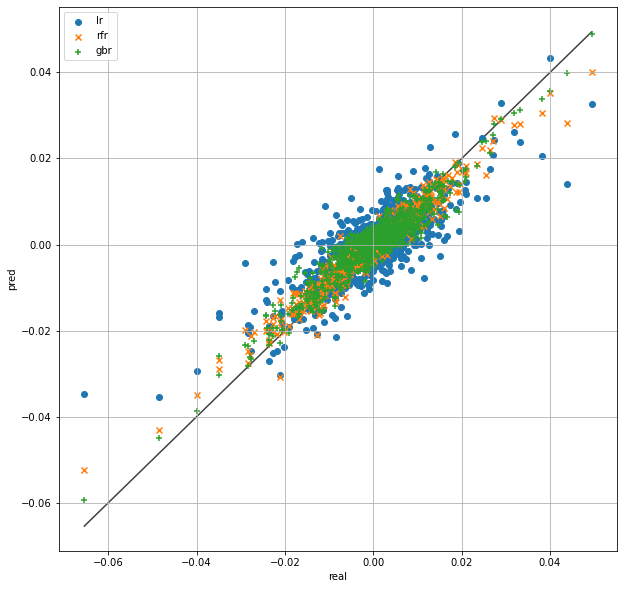

In [26]:
lr_preds = lr.predict(X_train)
ridge_preds = ridge.predict(X_train)
rfr_preds = rfr.predict(X_train)
gbr_preds = gbr.predict(X_train)
lgbm_preds = lgbm.predict(X_train)

score_dict = {
    'lr' : lr_preds,
#     'ridge' : ridge_preds,
    'gbr' : gbr_preds,
    'rfr' : rfr_preds,
#     'lgbm' : lgbm_preds,
    'real' : y_train
}

pred_df = pd.DataFrame(score_dict)
lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.lr, marker='o', label='lr')
# plt.scatter(pred_df.real, pred_df.lgbm, marker='.', label='lgbm')
plt.scatter(pred_df.real, pred_df.rfr, marker='x', label='rfr')
plt.scatter(pred_df.real, pred_df.gbr, marker='+', label='gbr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

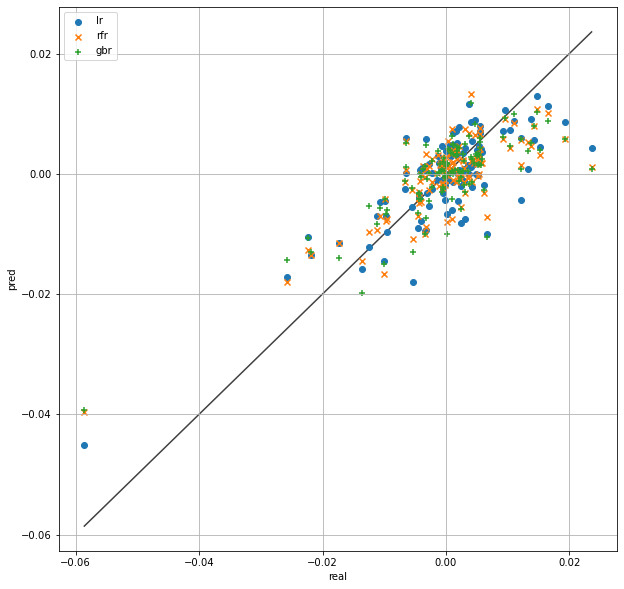

In [27]:
lr_preds = lr.predict(X_test)
ridge_preds = ridge.predict(X_test)
rfr_preds = rfr.predict(X_test)
gbr_preds = gbr.predict(X_test)
lgbm_preds = lgbm.predict(X_test)

score_dict = {
    'lr' : lr_preds,
#     'ridge' : ridge_preds,
    'gbr' : gbr_preds,
    'rfr' : rfr_preds,
#     'lgbm' : lgbm_preds,
    'real' : y_test
}

pred_df = pd.DataFrame(score_dict)
lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.lr, marker='o', label='lr')
# plt.scatter(pred_df.real, pred_df.lgbm, marker='.', label='lgbm')
plt.scatter(pred_df.real, pred_df.rfr, marker='x', label='rfr')
plt.scatter(pred_df.real, pred_df.gbr, marker='+', label='gbr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

## 딥러닝 적용

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
activation = tf.nn.leaky_relu
# activation = 'tanh'

model = Sequential()
model.add(layers.Dense(64, input_dim=72, activation=activation))
model.add(layers.Dense(1, activation='linear'))
model.summary()

Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4672      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


2021-11-25 16:19:08.918460: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-25 16:19:08.918542: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
model.compile(optimizer = 'adam', loss = 'mse')

In [31]:
model.fit(X_train, y_train, validation_split=0.1, epochs = 200, batch_size = 10)

2021-11-25 16:19:08.988027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-25 16:19:08.988205: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200


2021-11-25 16:19:09.128698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 1s 6ms/step - loss: 9.1074e-05 - val_loss: 4.0321e-05
Epoch 2/200
35/97 [=========>....................] - ETA: 0s - loss: 4.9777e-05

2021-11-25 16:19:09.672603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


97/97 [==============================] - 0s 3ms/step - loss: 5.1667e-05 - val_loss: 3.4679e-05
Epoch 3/200
97/97 [==============================] - 0s 3ms/step - loss: 4.4556e-05 - val_loss: 3.6655e-05
Epoch 4/200
97/97 [==============================] - 0s 3ms/step - loss: 3.8489e-05 - val_loss: 3.4673e-05
Epoch 5/200
97/97 [==============================] - 0s 3ms/step - loss: 3.9668e-05 - val_loss: 3.1354e-05
Epoch 6/200
97/97 [==============================] - 0s 3ms/step - loss: 3.1516e-05 - val_loss: 5.6989e-05
Epoch 7/200
97/97 [==============================] - 0s 3ms/step - loss: 3.0774e-05 - val_loss: 3.1318e-05
Epoch 8/200
97/97 [==============================] - 0s 3ms/step - loss: 2.9840e-05 - val_loss: 6.1331e-05
Epoch 9/200
97/97 [==============================] - 0s 3ms/step - loss: 2.9051e-05 - val_loss: 4.0113e-05
Epoch 10/200
97/97 [==============================] - 0s 3ms/step - loss: 2.7770e-05 - val_loss: 4.1503e-05
Epoch 11/200
97/97 [============================

97/97 [==============================] - 0s 3ms/step - loss: 1.1773e-05 - val_loss: 5.3023e-05
Epoch 79/200
97/97 [==============================] - 0s 3ms/step - loss: 1.3994e-05 - val_loss: 5.1763e-05
Epoch 80/200
97/97 [==============================] - 0s 3ms/step - loss: 1.4819e-05 - val_loss: 4.4748e-05
Epoch 81/200
97/97 [==============================] - 0s 3ms/step - loss: 1.4013e-05 - val_loss: 5.5151e-05
Epoch 82/200
97/97 [==============================] - 0s 3ms/step - loss: 1.2901e-05 - val_loss: 4.9074e-05
Epoch 83/200
97/97 [==============================] - 0s 3ms/step - loss: 1.3578e-05 - val_loss: 4.2387e-05
Epoch 84/200
97/97 [==============================] - 0s 3ms/step - loss: 1.2516e-05 - val_loss: 4.6305e-05
Epoch 85/200
97/97 [==============================] - 0s 3ms/step - loss: 1.3073e-05 - val_loss: 5.1518e-05
Epoch 86/200
97/97 [==============================] - 0s 3ms/step - loss: 1.1486e-05 - val_loss: 5.0170e-05
Epoch 87/200
97/97 [=====================

0.8390382342542424


2021-11-25 16:20:10.775530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


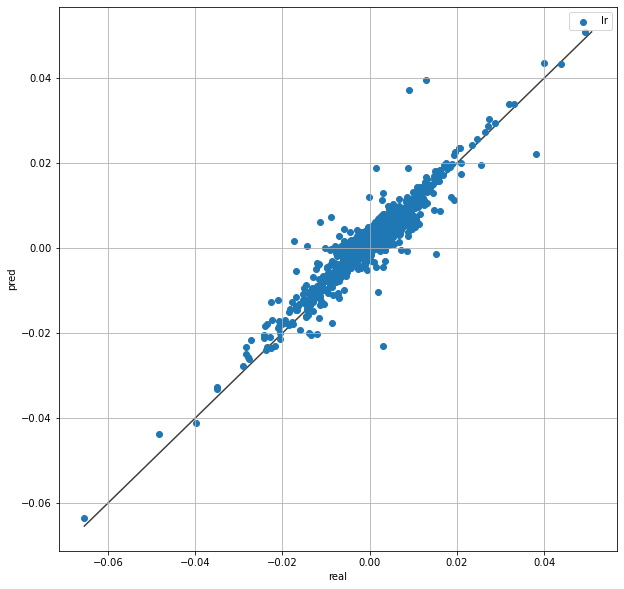

In [32]:
from sklearn.metrics import r2_score


train_preds = [v[0] for v in model.predict(X_train)]


print(r2_score(train_preds, list(y_train)))


score_dict = {
    'dl' : train_preds,
    'real' : y_train
}

pred_df = pd.DataFrame(score_dict)

lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

0.40015190731664285


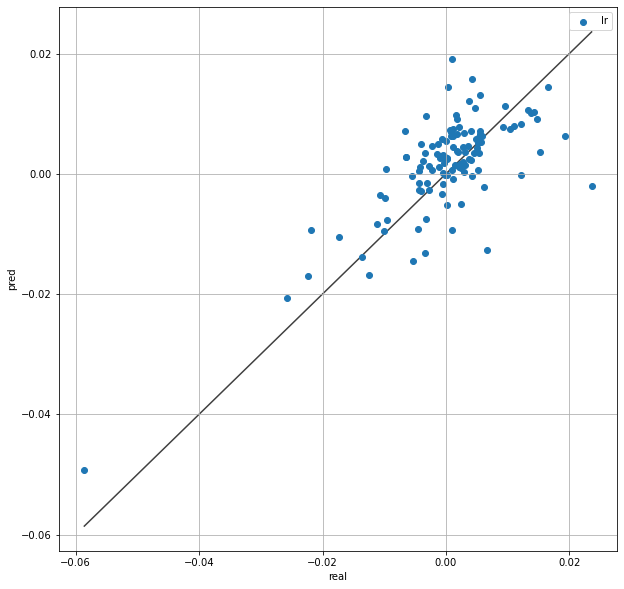

In [33]:
from sklearn.metrics import r2_score


preds = [v[0] for v in model.predict(X_test)]


print(r2_score(preds, list(y_test)))


score_dict = {
    'dl' : preds,
    'real' : y_test
}

pred_df = pd.DataFrame(score_dict)

lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

## Backtesting 적용
- 최근 300일의 휴일 데이터를 통해 test

In [103]:
one_day = timedelta(days=1)

X_v = []
y_v = []
v_dates = []

temp = None

for idx in range(len(holiday_list)-300, len(holiday_list)) :
    
    #휴일 시작일
    holiday_start = holiday_list[idx][0]
    
    #휴일 종료일
    holiday_end = holiday_list[idx][1]
    
    # 타겟 날짜(휴일 다음날의 날짜)
    target_day = holiday_end + one_day
    
    # 휴일기간 및 D+1일 지수 변동 데이터
    n_holiday = final_df.loc[holiday_start - one_day : holiday_end]
    
#     if len(n_holiday) > 3:
#         temp = n_holiday
#         break
    
    # 휴일 기간 동안 지수들의 누적 변동률
    n_holiday_change = (n_holiday + 1).cumprod() - 1

    # KOSPI, KOSDAQ을 제외한 지수들의 누적수익률 데이터
    X_data = n_holiday_change.loc[holiday_end].apply(lambda x : round(x, 4))

    # D+1일 KOSPI의 실제 수익률 y
    y_data = y_df.loc[target_day].apply(lambda x : round(x, 4))['y']
    v_dates.append(target_day)
    X_v.append(X_data.values)
    y_v.append(y_data)

In [104]:
X_v = np.array(X_v)
y_v = np.array(y_v)

In [105]:
val_preds = model.predict(X_v)

In [106]:
val_dict = {
    "date" : v_dates,
    "preds" : val_preds.reshape(-1)
}

In [107]:
val_df = pd.DataFrame(val_dict)
val_df['res'] = val_df.preds > 0

In [108]:
val_df['res'] = val_df.res.apply(lambda x : int(x))

In [109]:
val_df.set_index('date', inplace=True)

In [110]:
val_df = pd.merge(val_df, kospi, left_index=True, right_index=True)

In [111]:
val_df['gap'] = (val_df.Close - val_df.Open)/val_df.Open

In [112]:
val_df['cum'] = val_df['res'] * val_df['gap']

<AxesSubplot:>

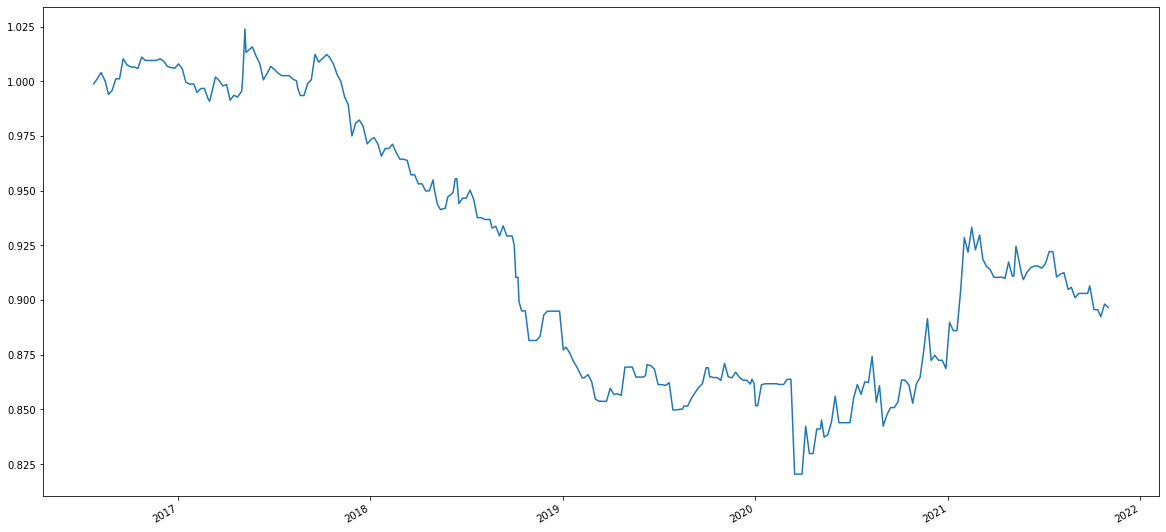

In [114]:
(val_df.cum + 1).cumprod().plot(figsize=(20,10))

In [115]:
val_df

,preds,res,Close,Open,High,Low,Volume,Change,gap,cum
2016-07-25,0.003355,1,2012.32,2014.74,2020.69,2006.63,350230000.0,0.0010,-0.001201,-0.001201
2016-08-01,0.005771,1,2029.61,2024.71,2031.58,2024.57,369590000.0,0.0067,0.002420,0.002420
2016-08-08,0.006252,1,2031.12,2025.55,2031.14,2018.81,270480000.0,0.0065,0.002750,0.002750
2016-08-16,0.003164,1,2047.76,2056.00,2063.09,2047.73,374870000.0,-0.0013,-0.004008,-0.004008
2016-08-22,0.000996,1,2042.16,2054.37,2054.71,2040.51,343500000.0,-0.0068,-0.005943,-0.005943
...,...,...,...,...,...,...,...,...,...,...
2021-10-05,0.002872,1,2962.17,2998.17,2998.17,2940.59,840560000.0,-0.0189,-0.012007,-0.012007
2021-10-12,-0.000081,0,2916.38,2950.22,2950.94,2901.51,660180000.0,-0.0135,-0.011470,-0.000000
2021-10-18,0.004564,1,3006.68,3017.48,3021.17,2990.44,926370000.0,-0.0028,-0.003579,-0.003579
2021-10-25,0.002502,1,3020.54,3001.10,3025.27,2983.29,791800000.0,0.0048,0.006478,0.006478


In [116]:
(val_df.cum + 1).cumprod()

2016-07-25    0.998799
2016-08-01    1.001216
2016-08-08    1.003969
2016-08-16    0.999946
2016-08-22    0.994002
                ...   
2021-10-05    0.895606
2021-10-12    0.895606
2021-10-18    0.892401
2021-10-25    0.898181
2021-11-01    0.896604
Name: cum, Length: 300, dtype: float64